In [15]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans



lines = ["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]

DE_genes=pd.read_csv('RNA_counts/DE_hiPSC.csv', index_col=0)
DE_genes=DE_genes.drop(['sum_filters'], axis=1)
TPMs = pd.read_csv('RNA_counts/TPMS_hiPSC.csv').iloc[:,0:22]
TPMs=TPMs.rename(columns={"Unnamed: 0": "geneid"})

RNA_means=pd.DataFrame(columns=["geneid","Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"])
ind=0
for gene in DE_genes.geneid:
    RNA_means.loc[ind,"geneid"]=gene
    for line in lines:
        if line=="Yoch6": #This is Yoch6
            RNA_means.loc[ind,line]=(TPMs[TPMs.geneid==gene][line+"r1"].values+TPMs[TPMs.geneid==gene][line+"r2"].values+TPMs[TPMs.geneid==gene][line+"r3"].values)/3
        else:
            RNA_means.loc[ind,line]=(TPMs[TPMs.geneid==gene][line+"r1"].values+TPMs[TPMs.geneid==gene][line+"r2"].values)/2
    ind=ind+1

DE_genes=pd.merge(DE_genes, RNA_means, on="geneid")


In [16]:
import main_funcs

In [17]:
#Seed initialisation for Kmeans 
np.random.seed(34601)

#Binarising transcriptional outputs.
DE_bin=main_funcs.binarize(DE_genes,lines)

In [4]:
DE_bin.to_csv('SVM/DE_genes_binary_SVM10.csv', index=False)

In [ ]:
# Functions to consolidate the data across cell lines and marks

In [18]:
def consolidate_data_glength(mark,annot, delta_length):
    df_lines=DE_bin.geneid
    for line in lines:
        filename=mark+"\\"+mark+"_"+line+"_"+annot+".dat"
        data_line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        data_line=data_line.drop([0], axis=1)
        data_line=data_line.rename(columns={1: "geneid", 2: line})
        data_line=pd.merge(data_line, genelength,on="geneid", how="inner")
        data_line.loc[:,line]=data_line.loc[:,line]/(data_line.loc[:,"glength"]-delta_length)
        df_lines=pd.merge(df_lines,data_line[["geneid",line]], on="geneid", how="left")
    df_lines.to_csv('SVM/DE_genes_'+mark+'_'+annot+'SVM10.csv', index=False)

In [19]:
def consolidate_data(mark,annot, length):
    df_lines=DE_bin.geneid
    for line in lines:
        filename=mark+"\\"+mark+"_"+line+"_"+annot+".dat"
        data_line=pd.read_csv(filename, sep='\t', header=None, lineterminator='\n')
        data_line=data_line.drop([0], axis=1)
        data_line=data_line.rename(columns={1: "geneid", 2: line})
        data_line.loc[:,line]=data_line.loc[:,line]/length
        df_lines=pd.merge(df_lines,data_line[["geneid",line]], on="geneid", how="left")
    df_lines.to_csv('SVM/DE_genes_'+mark+'_'+annot+'SVM10.csv', index=False)

In [20]:
#Preparing the data and saving it to file
genelength=pd.read_csv('genelength.csv')
genelength=genelength[['geneid','glength']]

consolidate_data_glength('K9me3','gene', 0)
consolidate_data('K9me3','prompm1k', 2000)
consolidate_data_glength('K9me3','genem1k', 1000)
consolidate_data('K9me3','prom1k', 1000)

consolidate_data_glength('K27me3','gene', 0)
consolidate_data('K27me3','prompm1k', 2000)
consolidate_data_glength('K27me3','genem1k', 1000)
consolidate_data('K27me3','prom1k', 1000)

consolidate_data_glength('K4me3','gene', 0)
consolidate_data('K4me3','prompm1k', 2000)
consolidate_data_glength('K4me3','genem1k', 1000)
consolidate_data('K4me3','prom1k', 1000)
consolidate_data('K4me3','tx_pm1k', 2000)
consolidate_data('K4me3','tx_prom_m1k', 1000)

consolidate_data_glength('ATAC','gene', 0)
consolidate_data('ATAC','prompm1k', 2000)
consolidate_data_glength('ATAC','genem1k', 1000)
consolidate_data('ATAC','prom1k', 1000)
consolidate_data('ATAC','tx_pm1k', 2000)
consolidate_data('ATAC','tx_prom_m1k', 1000)

In [21]:
#Loading data from file and preparing it for SVM

intensities_K4 = pd.read_csv('SVM/DE_genes_K4me3_geneSVM10.csv')
intensities_K4_tx = pd.read_csv('SVM/DE_genes_K4me3_tx_pm1kSVM10.csv')
intensities_K4_promoters = pd.read_csv('SVM/DE_genes_K4me3_prompm1kSVM10.csv')
intensities_K4_pm1k = np.maximum(intensities_K4_tx, intensities_K4_promoters)
intensities_K4 = np.maximum(intensities_K4, intensities_K4_pm1k)
intensities_K4 = pd.DataFrame(intensities_K4, columns=intensities_K4.columns, index=intensities_K4.index)
intensities_K9 = pd.read_csv('SVM/DE_genes_K9me3_geneSVM10.csv')
intensities_K27 = pd.read_csv('SVM/DE_genes_K27me3_geneSVM10.csv')
intensities_ATAC = pd.read_csv('SVM/DE_genes_ATAC_geneSVM10.csv')
intensities_ATAC_tx = pd.read_csv('SVM/DE_genes_ATAC_tx_pm1kSVM10.csv')
intensities_ATAC_promoters = pd.read_csv('SVM/DE_genes_ATAC_prompm1kSVM10.csv')
intensities_ATAC_pm1k = np.maximum(intensities_ATAC_tx, intensities_ATAC_promoters)
intensities_ATAC = np.maximum(intensities_ATAC, intensities_ATAC_pm1k)
intensities_ATAC = pd.DataFrame(intensities_ATAC, columns=intensities_ATAC.columns, index=intensities_ATAC.index)

#vars dataframe will be fed to the SVM.
epig_vars=['K4', 'K9', 'K27', 'ATAC']
vars = pd.DataFrame(columns=['geneid', 'line', 'K4', 'K9', 'K27', 'ATAC', 'expression'])
for line in lines:
    for gene in DE_bin['geneid']:
        vars.loc[len(vars)] = [gene, line, intensities_K4.loc[intensities_K4['geneid'] == gene, line].values[0], 
                               intensities_K9.loc[intensities_K9['geneid'] == gene, line].values[0], 
                               intensities_K27.loc[intensities_K27['geneid'] == gene, line].values[0],
                               intensities_ATAC.loc[intensities_ATAC['geneid'] == gene, line].values[0],
                               DE_bin.loc[DE_bin['geneid'] == gene, line + '_binary'].values[0]]


In [22]:
#Call to the SVM and post-processing of coeffs function.

coeff_def=main_funcs.SVM_analysis(DE_bin['geneid'], vars, epig_vars)

In [39]:
coeff_def

,geneid,K4,K9,K27,ATAC,intercept,K4_scale,K9_scale,K27_scale,ATAC_scale,...,nK27,nATAC,nK4_scale,nK9_scale,nK27_scale,nATAC_scale,n2K4_scale,n2K9_scale,n2K27_scale,n2ATAC_scale
0,ENSG00000002587,0.530486,-0.901900,0.623902,0.570326,-0.098100,0.016668,0.081320,0.109138,0.067902,...,0.463824,0.423994,4.094268,2.509361,2.215138,2.689694,0.357262,-0.788293,0.181300,0.482320
1,ENSG00000003436,4.254198,-0.055190,-0.235721,8.288769,-1.100320,0.011194,1.177759,3.739882,0.148539,...,-0.025292,0.889363,4.492381,0.000000,0.000000,1.906905,0.453714,-0.000000,-0.000000,0.717267
2,ENSG00000004948,7.067989,0.057666,3.102459,1.077794,-7.032137,0.027852,7.959607,1.224397,0.191932,...,0.398056,0.138285,3.580842,0.000000,0.000000,1.650616,0.718487,0.000000,0.000000,0.096537
3,ENSG00000005421,2.661126,-3.185758,1.663692,1.966789,-1.973704,0.153590,8.493271,4.437630,0.285133,...,0.340546,0.402588,1.873469,0.000000,0.000000,1.254798,0.225795,-0.000000,0.000000,0.213652
4,ENSG00000006016,0.407297,0.575871,-3.635514,0.524059,0.520519,0.031061,8.910578,0.029310,0.383864,...,-0.972010,0.140115,3.471794,0.000000,3.529825,0.957467,0.083651,0.000000,-0.605434,0.056739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,ENSG00000278662,-2.886205,0.054543,-0.340248,1.811466,2.015728,4.930373,15.277058,2.329200,2.049380,...,-0.099344,0.528902,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
708,ENSG00000279656,-3.146535,0.892451,-12.223448,0.707715,9.037867,0.819676,1.864942,3.489489,0.469199,...,-0.964509,0.055843,0.198846,0.000000,0.000000,0.756729,-0.010923,0.000000,-0.000000,0.017872
709,ENSG00000279692,1.530085,-0.904740,-5.229462,2.372662,-0.220931,0.008756,3.919120,0.061800,0.091220,...,-0.869929,0.394696,4.738025,0.000000,2.783849,2.394477,0.266833,-0.000000,-0.427339,0.399711
710,ENSG00000280143,-1.847675,-5.740073,4.876303,14.106657,-9.814357,1.458212,11.451643,6.558277,0.280421,...,0.302918,0.876311,0.000000,0.000000,0.000000,1.271462,-0.000000,-0.000000,0.000000,0.471231


In [41]:
coeff_def[["geneid","n2K4_scale", "n2K9_scale", "n2K27_scale", "n2ATAC_scale"]].to_csv("log-resc-coeffs.csv")

## Clustering ##

In [25]:
from matplotlib import rcParams
from matplotlib import rc
import matplotlib.pyplot as plt 

plt.rcParams.update({'font.size': 16})
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

In [12]:
#Clustering checks. Fig S5A
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

seed_random = 24601

fitted_kmeans = {}
labels_kmeans = {}
df_scores = []
k_values_to_try = np.arange(2, 20)
X = coeff_def[['n2K4_scale', 'n2K9_scale', 'n2K27_scale', 'n2ATAC_scale']]
for n_clusters in k_values_to_try:
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=seed_random,
                    n_init=1000,
                    )
    labels_clusters = kmeans.fit_predict(X)
    
    #Insert fitted model and calculated cluster labels in dictionaries,
    #for further reference.
    fitted_kmeans[n_clusters] = kmeans
    labels_kmeans[n_clusters] = labels_clusters
    
    #Scores
    silhouette = silhouette_score(X, labels_clusters)
    ch = calinski_harabasz_score(X, labels_clusters)
    db = davies_bouldin_score(X, labels_clusters)
    tmp_scores = {"n_clusters": n_clusters,
                  "silhouette_score": silhouette,
                  "calinski_harabasz_score": ch,
                  "davies_bouldin_score": db,
                  }
    df_scores.append(tmp_scores)

#Create a DataFrame of clustering scores, using `n_clusters` as index, for easier plotting.
df_scores = pd.DataFrame(df_scores)
df_scores.set_index("n_clusters", inplace=True)

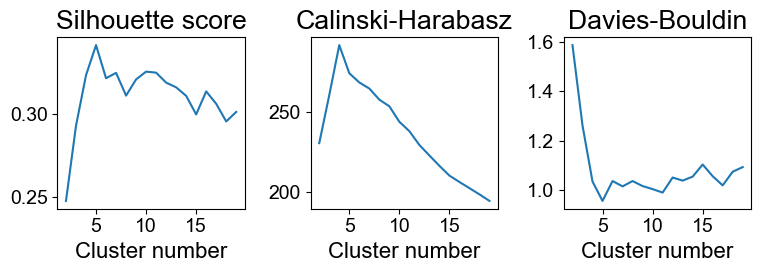

In [13]:
fig, ax =plt.subplots(1,3)
fig.set_size_inches(8,3)

ax[0].plot(df_scores.index, df_scores.silhouette_score)
ax[0].set_title('Silhouette score')
ax[0].set_xlabel('Cluster number')

ax[1].plot(df_scores.index, df_scores.calinski_harabasz_score)
ax[1].set_title('Calinski-Harabasz')
ax[1].set_xlabel('Cluster number')

ax[2].plot(df_scores.index, df_scores.davies_bouldin_score)
ax[2].set_title('Davies-Bouldin')
ax[2].set_xlabel('Cluster number')

fig.tight_layout()
plt.savefig("FigS5A.png", format='png', dpi=300)
plt.show()

In [26]:
#Clustering of genes into regulatory modes
seed_random = 24602
X = coeff_def[['n2K4_scale', 'n2K9_scale', 'n2K27_scale', 'n2ATAC_scale']]
kmeans = KMeans(n_clusters=10,
                    random_state=seed_random,
                    n_init=1000,
                    )
clustering = kmeans.fit(X)
labels_clusters = kmeans.fit_predict(X)
clustering.cluster_centers_

array([[ 2.71104600e-01, -9.52587736e-03, -4.67177210e-01,
         3.39384965e-01],
       [ 4.59081330e-01, -9.74416812e-03, -6.66608395e-03,
         5.18962012e-01],
       [ 3.15625158e-01, -1.09874840e-02,  3.99383532e-03,
         1.39785409e-01],
       [ 1.27306817e-02, -9.01053938e-03, -2.06488713e-02,
         2.38154232e-02],
       [ 6.59937337e-01, -7.72247111e-03, -1.93332930e-02,
        -3.72611195e-02],
       [ 1.42252054e-02, -7.36453014e-03, -6.64809894e-01,
        -1.86233069e-02],
       [ 3.17960404e-01, -6.36954888e-01,  1.88902527e-02,
         2.73294084e-01],
       [ 1.46774463e-01,  4.06730713e-02, -1.22798789e-01,
        -3.44435308e-01],
       [ 4.29133564e-02,  1.45953724e-04, -3.43626222e-02,
         4.56774580e-01],
       [ 5.52141342e-01,  5.65307465e-04, -4.64536401e-01,
         9.71390229e-03]])

In [37]:
#Which variables have a log resc coeff >0.2 determines the name of the cluster.
abs(clustering.cluster_centers_)>0.2

array([[ True, False,  True,  True],
       [ True, False, False,  True],
       [ True, False, False, False],
       [False, False, False, False],
       [ True, False, False, False],
       [False, False,  True, False],
       [ True,  True, False,  True],
       [False, False, False,  True],
       [False, False, False,  True],
       [ True, False,  True, False]])

In [38]:
cluster_names=['K4&K27&ATAC', 'K4&ATAC', 'weak K4', 'origin', 'strong K4', 
               'K27', 'K4&K9&ATAC', 'anti-ATAC', 'ATAC', 'K4&K27']

In [46]:
cluster_name_gene=[cluster_names[labels_clusters[i]]for i in range(len(labels_clusters))]

In [49]:
gene_cluster=pd.DataFrame(data= {'gene_id': coeff_def.geneid, 'cluster': cluster_name_gene})
gene_cluster.to_csv("gene_cluster_name.csv")

# Further downstream analysis. Figs. 4 and 6 in manuscript #

In [15]:
import matplotlib
cmap = plt.cm.nipy_spectral  # define the colormap
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]

# create the new map
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)

# define the bins and normalize
bounds = np.linspace(-0.5, 9.5, 11)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

import math
list_col=[math.ceil(i*255/9) for i in range(10)]
cmaplist_disc=[cmaplist[list_col[i]] for i in range(10)]

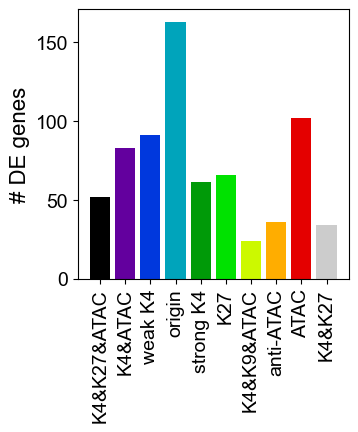

In [16]:
fig, ax = plt.subplots(figsize=(3.5,3.5))
x=np.linspace(0,9,10)
for i in range(10):
    ax.bar(x[i],np.bincount(labels_clusters)[i],color=cmaplist_disc[i])
ax.set_xticks(x, cluster_names, rotation=90)
ax.set_ylabel("# DE genes")
plt.rc('xtick', labelsize=16) 

plt.savefig("Fig_S5B.png", format='png',bbox_inches='tight')
plt.show()

In [17]:
from sklearn import pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pipeline_PCA = pipeline.Pipeline([('scaling', StandardScaler(with_mean=False)), ('pca', PCA(n_components=4))])
PCAs_scatter=pipeline_PCA.fit_transform(np.array(coeff_def[['n2K4_scale', 'n2K9_scale', 'n2K27_scale', 'n2ATAC_scale']]))
                                    

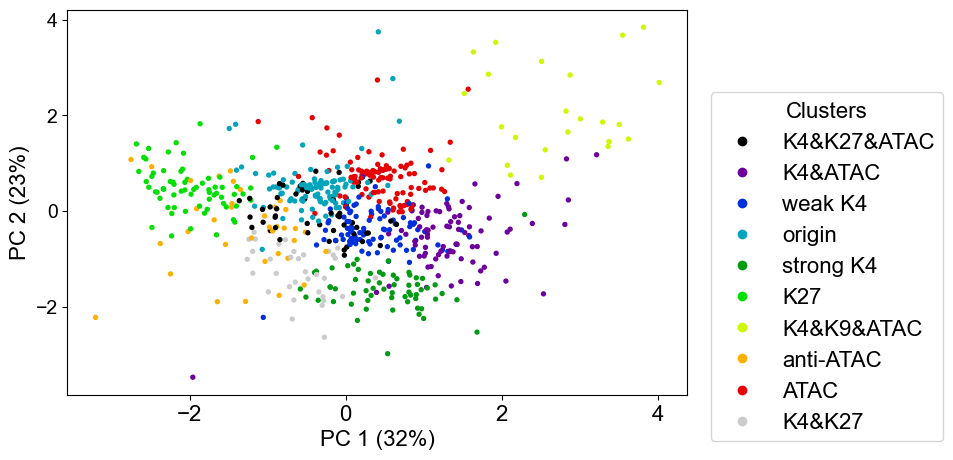

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
scatter = ax.scatter(PCAs_scatter[:,0],PCAs_scatter[:,1],c=labels_clusters, cmap=cmap, norm=norm, s=8)
legend1 = ax.legend(handles=scatter.legend_elements()[0] ,labels=cluster_names,
                    loc="lower left", title="Clusters", bbox_to_anchor=(1.02, -0.15))


ax.set_xticks([-2,0,2,4]) 
ax.set_yticks([-2,0,2,4]) 
ax.set_xlabel("PC 1 ("+str(pipeline_PCA.named_steps['pca'].explained_variance_ratio_[0]*100)[0:2]+"%)")
ax.set_ylabel("PC 2 ("+str(pipeline_PCA.named_steps['pca'].explained_variance_ratio_[1]*100)[0:2]+"%)")

plt.savefig('Fig_3D.tif',bbox_inches='tight',dpi = 200)
plt.show()

## ATAC & expression ##

In [23]:
ATAC_av=[]
for ib in range (10):
    xbin=[]
    for gene in DE_genes.geneid[[labels_clusters[i]==ib for i in range(len(labels_clusters))]]:
        x = coeff_def[coeff_def['geneid']==gene].n2ATAC_scale
        xbin.extend(x)
    ATAC_av.append(np.mean(xbin))

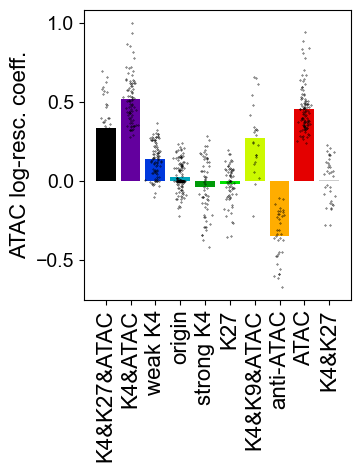

In [24]:
fig, ax = plt.subplots(figsize=(4,5))
x=np.linspace(0,9,10)
for i in range(10):
    ax.bar(x[i],ATAC_av[i],color=cmaplist_disc[i])
for i in range(len(DE_bin.geneid)):
    ax.scatter(labels_clusters[i]+np.random.normal(0, 0.1), coeff_def.iloc[i].n2ATAC_scale, s=0.1, color='black')
ax.set_xticks(x, cluster_names, rotation=90)
ax.set_ylabel("ATAC log-resc. coeff.")
plt.rc('xtick', labelsize=16)
plt.tight_layout()
plt.savefig("Fig4A.png", format='png', dpi=300)

plt.show()

## Scatter plots - regulation ##

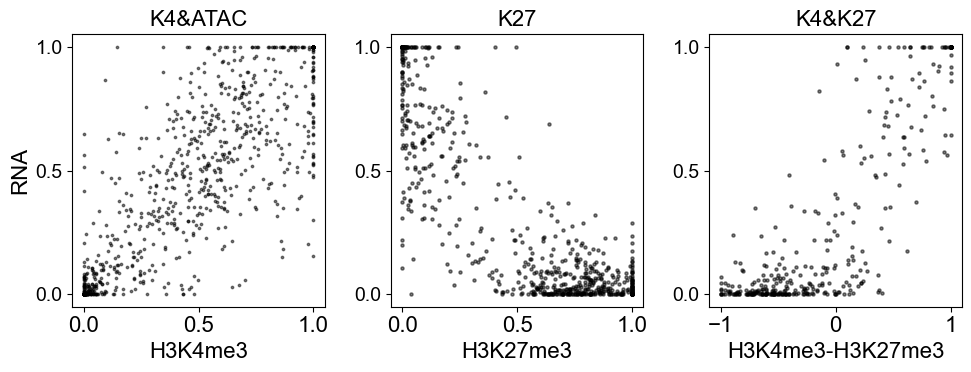

In [21]:
# scatter plot -  The important ones

fig, ax = plt.subplots(1, 3, figsize=(10,4))

plt.setp(ax, xticks=[0, 0.5, 1], yticks=[0, 0.5, 1])

XY = pd.DataFrame(columns=['x', 'y'])
for gene in DE_bin.geneid[[labels_clusters[i]==1 for i in range(len(labels_clusters))]]:
    x = intensities_K4[intensities_K4['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
    if (x.max() - x.min())!=0:
        x = (x - x.min()) / (x.max() - x.min())
    z = DE_bin[DE_bin['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
    if (z.max() - z.min())!=0:
        z = (z - z.min()) / (z.max() - z.min())

    xy = pd.DataFrame({'x': x[0], 'y': z[0]}) # Change x, y, z here to plot different dimensions
    #color by different lines
    ax[0].scatter(xy.x, xy.y, c='black', s = 3, alpha=0.5)
#    xy = xy.sort_values('y')
#    ax[0,0].plot(xy.x, xy.y, alpha=0.15, linewidth=2, color=cmaplist_disc[1])

ax[0].set_title(cluster_names[1], fontsize=16)
ax[0].set_xlabel('H3K4me3')
ax[0].set_ylabel('RNA')
ax[0].set_yticks([0,0.5,1])
ax[0].set_xticks([0,0.5,1])


XY = pd.DataFrame(columns=['x', 'y'])
for gene in DE_bin.geneid[[labels_clusters[i]==5 for i in range(len(labels_clusters))]]:
    x = intensities_K27[intensities_K27['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
    if (x.max() - x.min())!=0:
        x = (x - x.min()) / (x.max() - x.min())
    z = DE_bin[DE_bin['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
    if (z.max() - z.min())!=0:
           z = (z - z.min()) / (z.max() - z.min())

    xy = pd.DataFrame({'x': x[0], 'y': z[0]}) # Change x, y, z here to plot different dimensions
    #color by different lines
    ax[1].scatter(xy.x, xy.y, c='black', s = 5, alpha=0.5)


ax[1].set_title(cluster_names[5], fontsize=16)
ax[1].set_xlabel('H3K27me3')

XY = pd.DataFrame(columns=['x', 'y'])
for gene in DE_bin.geneid[[labels_clusters[i]==9 for i in range(len(labels_clusters))]]:
    x = intensities_K4_promoters[intensities_K4['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
    if (x.max() - x.min())!=0:
        x = (x - x.min()) / (x.max() - x.min())
    z = DE_bin[DE_bin['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
    if (z.max() - z.min())!=0:
        z = (z - z.min()) / (z.max() - z.min())
    y = intensities_K27[intensities_K27['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
    if (y.max() - y.min())!=0:
        y = (y - y.min()) / (y.max() - y.min())

    xy = pd.DataFrame({'x': x[0]-y[0], 'y': z[0]}) # Change x, y, z here to plot different dimensions
    #color by different lines
    ax[2].scatter(xy.x, xy.y, c='black', s = 5, alpha=0.5)

ax[2].set_xticks([-1,0,1])
ax[2].set_title(cluster_names[9], fontsize=16)
ax[2].set_xlabel('H3K4me3-H3K27me3')

plt.tight_layout()
plt.savefig("Fig4B.png", format='png',bbox_inches='tight', dpi=300)
plt.show()

## Bimodality ##

In [30]:
intensities_K27_promoters = pd.read_csv('SVM/DE_genes_K27me3_prompm1kSVM10.csv')
intensities_K4_promoters = pd.read_csv('SVM/DE_genes_K4me3_prompm1kSVM10.csv')
intensities_K27_genem1k = pd.read_csv('SVM/DE_genes_K27me3_genem1kSVM10.csv')
intensities_K4_genem1k = pd.read_csv('SVM/DE_genes_K4me3_genem1kSVM10.csv')

In [31]:
import numpy as np
import diptest

In [32]:
from scipy.stats import skew
from scipy.stats import kurtosis

DSspm1k=[]
for ib in range (10):
    xbin=[]
    ybin=[]
    zbin=[]
    abin=[]
    for gene in DE_bin.geneid[[labels_clusters[i]==ib for i in range(len(labels_clusters))]]:
        x = intensities_K4_promoters[intensities_K4_promoters['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
        if (x.size>0):
            if (x.max() - x.min())!=0:
                x = (x - x.min()) / (x.max() - x.min())
                x=np.delete(x, x.argmax())
                x=np.delete(x, x.argmin())
                xbin.extend(x)            
        y = intensities_K27_promoters[intensities_K27_promoters['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
        if (y.size>0):
            if (y.max() - y.min())!=0:
                y = (y - y.min()) / (y.max() - y.min())
                y = np.delete(y, y.argmax())
                y = np.delete(y, y.argmin())
                ybin.extend(y)                       

        z = DE_bin[DE_bin['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
        if (z.max() - z.min())!=0:
            z = (z - z.min()) / (z.max() - z.min())
            z = np.delete(z, z.argmax())
            z = np.delete(z, z.argmin())
            zbin.extend(z)            
        a = intensities_ATAC_promoters[intensities_ATAC_promoters['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
        if (a.size>0):
            if (a.max() - a.min())!=0:
                a = (a - a.min()) / (a.max() - a.min())
                a = np.delete(a, a.argmax())
                a = np.delete(a, a.argmin())
                abin.extend(a)            
    cleaned_listx = [x for x in xbin if (type(x) == float) or (type(x)==np.float64)]
    cleaned_listy = [y for y in ybin if (type(y) == float) or (type(y)==np.float64)]
    cleaned_listz = [z for z in zbin if (type(z) == float) or (type(z)==np.float64)]
    cleaned_lista = [a for a in abin if (type(a) == float) or (type(a)==np.float64)]
    DSx, DTx=diptest.diptest(np.array(cleaned_listx))
    DSy, DTy=diptest.diptest(np.array(cleaned_listy))
    DSz, DTz=diptest.diptest(np.array(cleaned_listz))
    DSa, DTa=diptest.diptest(np.array(cleaned_lista))
    DSspm1k.append([DSx,DSy,DSz, DSa])
    

In [33]:
#Dip statistic for gene bodies (+1kb to TTS)
DSs_bodies=[]
for ib in range (10):
    xbin=[]
    ybin=[]
    for gene in DE_bin.geneid[[labels_clusters[i]==ib for i in range(len(labels_clusters))]]:
        x = intensities_K4_genem1k[intensities_K4_genem1k['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
        if (x.size>0):
            if (x.max() - x.min())!=0:
                x = (x - x.min()) / (x.max() - x.min())
                x=np.delete(x, x.argmax())
                x=np.delete(x, x.argmin())
                xbin.extend(x)            
        y = intensities_K27_genem1k[intensities_K27_genem1k['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
        if (y.size>0):
            if (y.max() - y.min())!=0:
                y = (y - y.min()) / (y.max() - y.min())
                y = np.delete(y, y.argmax())
                y = np.delete(y, y.argmin())
                ybin.extend(y)                       
    cleaned_listx = [x for x in xbin if (type(x) == float) or (type(x)==np.float64)]
    cleaned_listy = [y for y in ybin if (type(y) == float) or (type(y)==np.float64)]
    DSx, DTx=diptest.diptest(np.array(cleaned_listx))
    DSy, DTy=diptest.diptest(np.array(cleaned_listy))
    DSs_bodies.append([DSx,DSy])

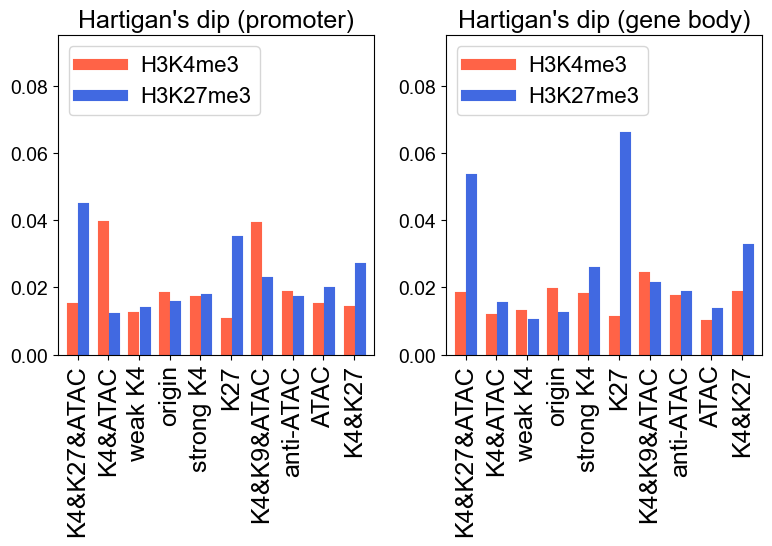

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(8, 5.75))

xax=np.arange(10)
for i in range(10):
    if i==0:
        ax[0].plot([xax[i]-0.18,xax[i]-0.18],[0,DSspm1k[i][0]], color="tomato", label="H3K4me3", linewidth=8)
        ax[0].plot([xax[i]+0.18,xax[i]+0.18],[0,DSspm1k[i][1]], color="royalblue", label="H3K27me3", linewidth=8)
    else:
        ax[0].plot([xax[i]-0.18,xax[i]-0.18],[0,DSspm1k[i][0]], color="tomato",  linewidth=8)
        ax[0].plot([xax[i]+0.18,xax[i]+0.18],[0,DSspm1k[i][1]], color="royalblue", linewidth=8)

ax[0].set_ylim([0,0.095])
ax[0].set_xticks(np.linspace(0,9,10), cluster_names, rotation=90, fontsize=18)
ax[0].legend(loc='upper left')
ax[0].set_title("Hartigan's dip (promoter)", fontsize=18)

for i in range(10):
    if i==0:
        ax[1].plot([xax[i]-0.18,xax[i]-0.18],[0,DSs_bodies[i][0]], color="tomato", label="H3K4me3", linewidth=8)
        ax[1].plot([xax[i]+0.18,xax[i]+0.18],[0,DSs_bodies[i][1]], color="royalblue", label="H3K27me3", linewidth=8)
    else:
        ax[1].plot([xax[i]-0.18,xax[i]-0.18],[0,DSs_bodies[i][0]], color="tomato",  linewidth=8)
        ax[1].plot([xax[i]+0.18,xax[i]+0.18],[0,DSs_bodies[i][1]], color="royalblue", linewidth=8)

ax[1].set_ylim([0,0.095])
ax[1].set_xticks(np.linspace(0,9,10), cluster_names, rotation=90, fontsize=18)
ax[1].legend(loc='upper left')
ax[1].set_title("Hartigan's dip (gene body)", fontsize=18)
plt.tight_layout()
plt.savefig("Fig4C.png", format='png',bbox_inches='tight', dpi=300)
plt.show()


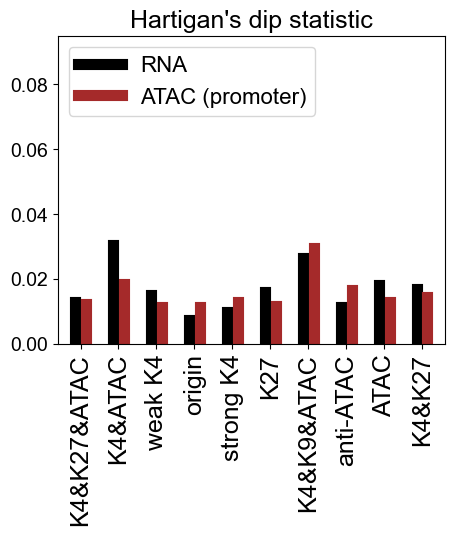

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

xax=np.arange(10)
for i in range(10):
    if i==0:
        ax.plot([xax[i]-0.14,xax[i]-0.14],[0,DSspm1k[i][2]], color="black", label="RNA", linewidth=8)
        ax.plot([xax[i]+0.14,xax[i]+0.14],[0,DSspm1k[i][3]], color="brown", label="ATAC (promoter)", linewidth=8)
    else:
        ax.plot([xax[i]-0.14,xax[i]-0.14],[0,DSspm1k[i][2]], color="black",  linewidth=8)
        ax.plot([xax[i]+0.14,xax[i]+0.14],[0,DSspm1k[i][3]], color="brown", linewidth=8)

ax.set_ylim([0,0.095])
ax.set_xticks(np.linspace(0,9,10), cluster_names, rotation=90, fontsize=18)
ax.legend(loc='upper left')
ax.set_title("Hartigan's dip statistic", fontsize=18)
plt.savefig("FigS6A.png", format='png',bbox_inches='tight', dpi=300)
plt.show()

In [140]:
# Data export for modelling

HDS=pd.DataFrame(columns=['K4', 'K27b', 'K27p'])
for i in range(10):
    HDS.loc[i]=[DSspm1k[i][0], DSs_bodies[i][1], DSspm1k[i][1]]
    
HDS.to_csv('HDS_clusters.csv')

In [144]:
data_levels=pd.DataFrame(columns=['level', 'cluster', 'annot', 'RNA'])
ind=0
for ib in range(10):
    for gene in DE_genes.geneid[[labels_clusters[i]==ib for i in range(len(labels_clusters))]]:
        x = intensities_K4_genem1k[intensities_K4_genem1k['geneid']==gene][lines].values
        z = DE_bin[DE_bin['geneid']==gene][lines].values
        if (x.max() - x.min())!=0:
            x = (x - x.min()) / (x.max() - x.min())
            if (z.max() - z.min())!=0:
                z = (z - z.min()) / (z.max() - z.min())                   
            z = np.delete(z, [x.argmax(), x.argmin()])
            x = np.delete(x, [x.argmax(), x.argmin()])       
            for j in range(8):
                data_levels.loc[ind*8+j,"level"]=x[j]
                data_levels.loc[ind*8+j,"RNA"]=z[j]
                data_levels.loc[ind*8+j,"cluster"]=cluster_names[ib]
                data_levels.loc[ind*8+j,"annot"]="K4_body"
            ind=ind+1
        x = intensities_K27_genem1k[intensities_K27_genem1k['geneid']==gene][lines].values
        z = DE_bin[DE_bin['geneid']==gene][lines].values
        if (x.max() - x.min())!=0:
            x = (x - x.min()) / (x.max() - x.min())
            if (z.max() - z.min())!=0:
                z = (z - z.min()) / (z.max() - z.min())  
            z = np.delete(z, [x.argmax(), x.argmin()])
            x = np.delete(x, [x.argmax(), x.argmin()])       
            for j in range(8):
                data_levels.loc[ind*8+j,"level"]=x[j]
                data_levels.loc[ind*8+j,"RNA"]=z[j]
                data_levels.loc[ind*8+j,"cluster"]=cluster_names[ib]
                data_levels.loc[ind*8+j,"annot"]="K27_body"
            ind=ind+1
        x = intensities_K4_promoters[intensities_K4_promoters['geneid']==gene][lines].values
        z = DE_bin[DE_bin['geneid']==gene][lines].values
        if (x.max() - x.min())!=0:
            x = (x - x.min()) / (x.max() - x.min())
            if (z.max() - z.min())!=0:
                z = (z - z.min()) / (z.max() - z.min())  
            z = np.delete(z, [x.argmax(), x.argmin()])
            x = np.delete(x, [x.argmax(), x.argmin()])       
            for j in range(8):
                data_levels.loc[ind*8+j,"level"]=x[j]
                data_levels.loc[ind*8+j,"RNA"]=z[j]
                data_levels.loc[ind*8+j,"cluster"]=cluster_names[ib]
                data_levels.loc[ind*8+j,"annot"]="K4_pm1k"
            ind=ind+1
        x = intensities_K27_promoters[intensities_K27_promoters['geneid']==gene][lines].values
        z = DE_bin[DE_bin['geneid']==gene][lines].values
        if (x.max() - x.min())!=0:
            x = (x - x.min()) / (x.max() - x.min())
            if (z.max() - z.min())!=0:
                z = (z - z.min()) / (z.max() - z.min())  
            z = np.delete(z, [x.argmax(), x.argmin()])
            x = np.delete(x, [x.argmax(), x.argmin()])       
            for j in range(8):
                data_levels.loc[ind*8+j,"level"]=x[j]
                data_levels.loc[ind*8+j,"RNA"]=z[j]
                data_levels.loc[ind*8+j,"cluster"]=cluster_names[ib]
                data_levels.loc[ind*8+j,"annot"]="K27_pm1k" 
            ind=ind+1  
        x = intensities_ATAC_promoters[intensities_ATAC_promoters['geneid']==gene][lines].values
        z = DE_bin[DE_bin['geneid']==gene][lines].values
        if (x.max() - x.min())!=0:
            x = (x - x.min()) / (x.max() - x.min())
            if (z.max() - z.min())!=0:
                z = (z - z.min()) / (z.max() - z.min())  
            z = np.delete(z, [x.argmax(), x.argmin()])
            x = np.delete(x, [x.argmax(), x.argmin()])       
            for j in range(8):
                data_levels.loc[ind*8+j,"level"]=x[j]
                data_levels.loc[ind*8+j,"RNA"]=z[j]
                data_levels.loc[ind*8+j,"cluster"]=cluster_names[ib]
                data_levels.loc[ind*8+j,"annot"]="ATAC_pm1k" 
            ind=ind+1   
                

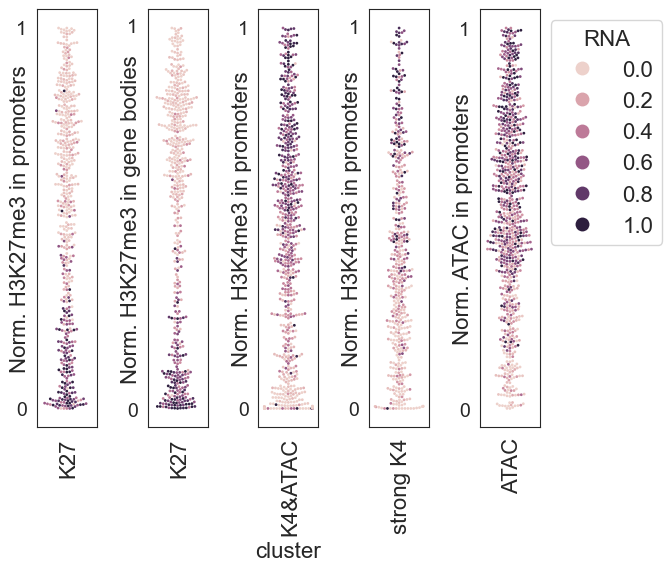

In [146]:
import seaborn as sns
fig, ax = plt.subplots(1,5,figsize=(7,6))
sns.set_style("white")
sns.swarmplot(data=data_levels[(data_levels["annot"]=="K27_pm1k") &  (data_levels["cluster"]==cluster_names[5])], x="cluster", y="level", hue="RNA", s=2, ax=ax[0])
ax[0].set_xlabel("")
ax[0].set_ylabel("Norm. H3K27me3 in promoters", labelpad=-10)
ax[0].set_xticks([0.2],ax[0].get_xticklabels(),rotation=90, ha="right")
ax[0].set_yticks([0,1])
ax[0].get_legend().remove()
sns.swarmplot(data=data_levels[(data_levels["annot"]=="K27_body") &  (data_levels["cluster"]==cluster_names[5])], x="cluster", y="level", hue="RNA", s=2, ax=ax[1])
ax[1].set_xlabel("")
ax[1].set_yticks([0,1])
ax[1].set_ylabel("Norm. H3K27me3 in gene bodies", labelpad=-10)
ax[1].set_xticks([0.2],ax[1].get_xticklabels(),rotation=90, ha="right")
ax[1].get_legend().remove()
sns.swarmplot(data=data_levels[(data_levels["annot"]=="K4_pm1k") &  (data_levels["cluster"]==cluster_names[1])], x="cluster", y="level", hue="RNA", s=2, ax=ax[2])
ax[2].set_xlabel("cluster")
ax[2].set_yticks([0,1])
ax[2].set_ylabel("Norm. H3K4me3 in promoters", labelpad=-10)
ax[2].set_xticks([0.2],ax[2].get_xticklabels(),rotation=90, ha="right")
ax[2].get_legend().remove()
sns.swarmplot(data=data_levels[(data_levels["annot"]=="K4_pm1k") &  (data_levels["cluster"]==cluster_names[4])], x="cluster", y="level", hue="RNA", s=2, ax=ax[3])
ax[3].set_xlabel("")
ax[3].set_yticks([0,1])
ax[3].set_ylabel("Norm. H3K4me3 in promoters", labelpad=-10)
ax[3].set_xticks([0.2],ax[3].get_xticklabels(),rotation=90, ha="right")
ax[3].get_legend().remove()
sns.swarmplot(data=data_levels[(data_levels["annot"]=="ATAC_pm1k") &  (data_levels["cluster"]==cluster_names[8])], x="cluster", y="level", legend="brief", hue="RNA", s=2, ax=ax[4])
ax[4].set_xlabel("")
ax[4].set_yticks([0,1])
ax[4].set_ylabel("Norm. ATAC in promoters", labelpad=-10)
ax[4].set_xticks([0.2],ax[4].get_xticklabels(),rotation=90, ha="right")

sns.move_legend(ax[4], "upper left", bbox_to_anchor=(1, 1), markerscale=5)
#plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("Fig4D.png", format='png',bbox_inches='tight', dpi=300)
plt.show()

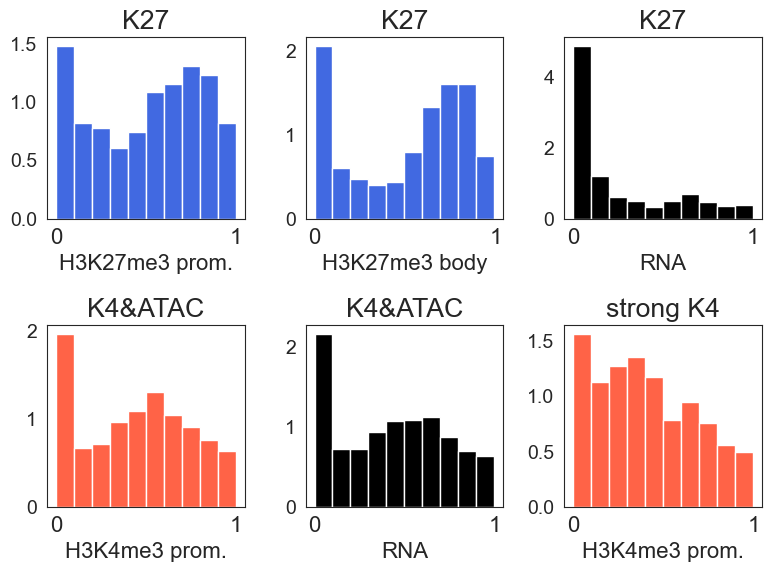

In [148]:
fig, ax=plt.subplots(2,3, figsize=(8,6))
xbin=[]
for gene in DE_bin.geneid[[labels_clusters[i]==5 for i in range(len(labels_clusters))]]:
    x = intensities_K27_promoters[intensities_K27_promoters['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
    if (x.max() - x.min())!=0:
        x = (x - x.min()) / (x.max() - x.min())
        x=np.delete(x, x.argmax())
        x=np.delete(x, x.argmin())
    xbin.extend(x)
ax[0,0].hist(xbin, bins=10, facecolor="royalblue", density=True)
ax[0,0].set_title(cluster_names[5])
ax[0,0].set_xlabel("H3K27me3 prom.")
xbin=[]
for gene in DE_bin.geneid[[labels_clusters[i]==5 for i in range(len(labels_clusters))]]:
    x = intensities_K27_genem1k[intensities_K27_genem1k['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
    if (x.max() - x.min())!=0:
        x = (x - x.min()) / (x.max() - x.min())
        x=np.delete(x, x.argmax())
        x=np.delete(x, x.argmin())
    xbin.extend(x)
ax[0,1].hist(xbin, bins=10, facecolor="royalblue", density=True)
ax[0,1].set_title(cluster_names[5])
ax[0,1].set_xlabel("H3K27me3 body")
xbin=[]
for gene in DE_bin.geneid[[labels_clusters[i]==5 for i in range(len(labels_clusters))]]:
    x = DE_bin[DE_bin['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
    if (x.max() - x.min())!=0:
        x = (x - x.min()) / (x.max() - x.min())
        x=np.delete(x, x.argmax())
        x=np.delete(x, x.argmin())
    xbin.extend(x)
ax[0,2].hist(xbin, bins=10, facecolor="black", density=True)
ax[0,2].set_title(cluster_names[5])
ax[0,2].set_xlabel("RNA")
xbin=[]
for gene in DE_bin.geneid[[labels_clusters[i]==1 for i in range(len(labels_clusters))]]:
    x = intensities_K4_promoters[intensities_K4_promoters['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
    if (x.max() - x.min())!=0:
        x = (x - x.min()) / (x.max() - x.min())
        x=np.delete(x, x.argmax())
        x=np.delete(x, x.argmin())
    xbin.extend(x)
ax[1,0].hist(xbin, bins=10, facecolor="tomato", density=True)
ax[1,0].set_title(cluster_names[1])
ax[1,0].set_xlabel("H3K4me3 prom.")
xbin=[]
for gene in DE_bin.geneid[[labels_clusters[i]==1 for i in range(len(labels_clusters))]]:
    x = DE_bin[DE_bin['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
    if (x.max() - x.min())!=0:
        x = (x - x.min()) / (x.max() - x.min())
        x=np.delete(x, x.argmax())
        x=np.delete(x, x.argmin())
    xbin.extend(x)
ax[1,1].hist(xbin, bins=10, facecolor="black", density=True)
ax[1,1].set_title(cluster_names[1])
ax[1,1].set_xlabel("RNA")
xbin=[]
for gene in DE_bin.geneid[[labels_clusters[i]==4 for i in range(len(labels_clusters))]]:
    x = intensities_K4_promoters[intensities_K4_promoters['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
    if (x.max() - x.min())!=0:
        x = (x - x.min()) / (x.max() - x.min())
        x=np.delete(x, x.argmax())
        x=np.delete(x, x.argmin())
    xbin.extend(x)
ax[1,2].hist(xbin, bins=10, facecolor="tomato", density=True)
ax[1,2].set_title(cluster_names[4])
ax[1,2].set_xlabel("H3K4me3 prom.")
plt.tight_layout()

plt.savefig("FigS6B.png", format='png',bbox_inches='tight', dpi=300)
plt.show()


## Regulatory patterns ##

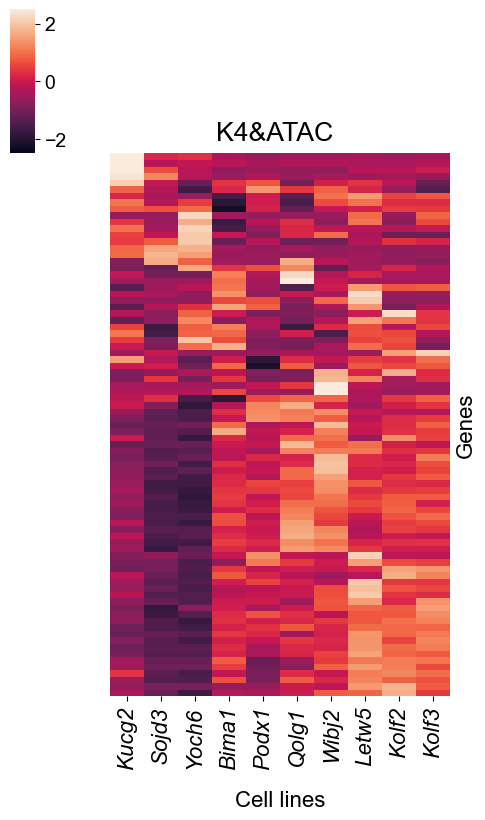

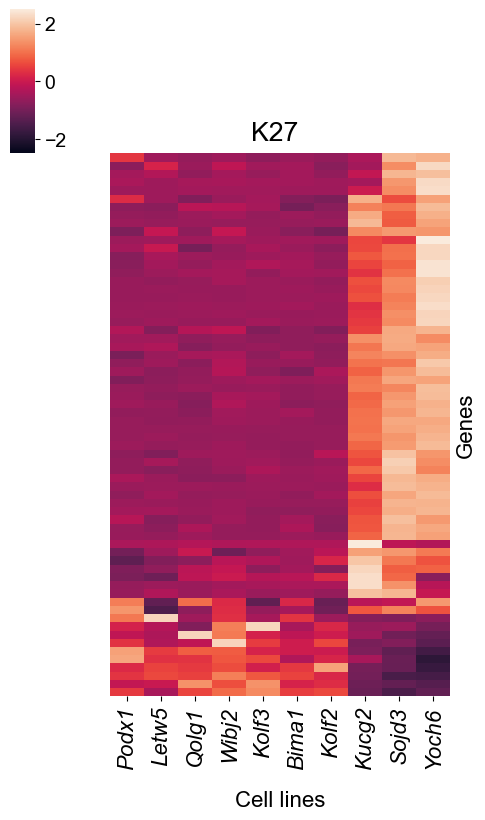

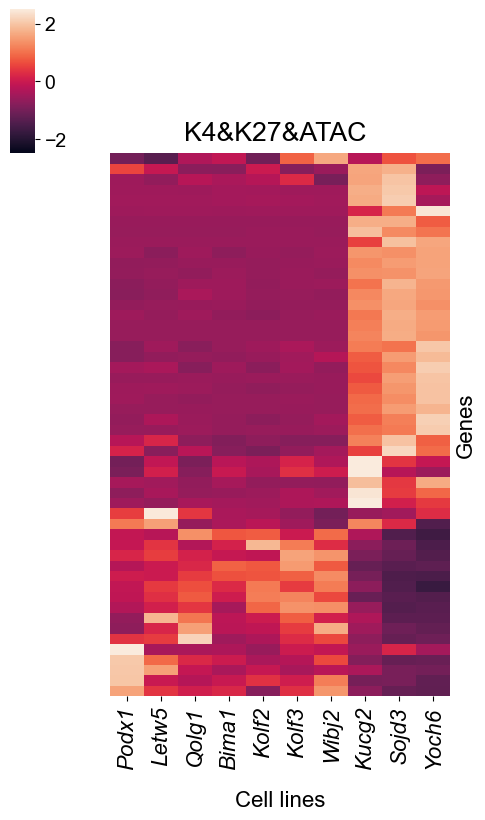

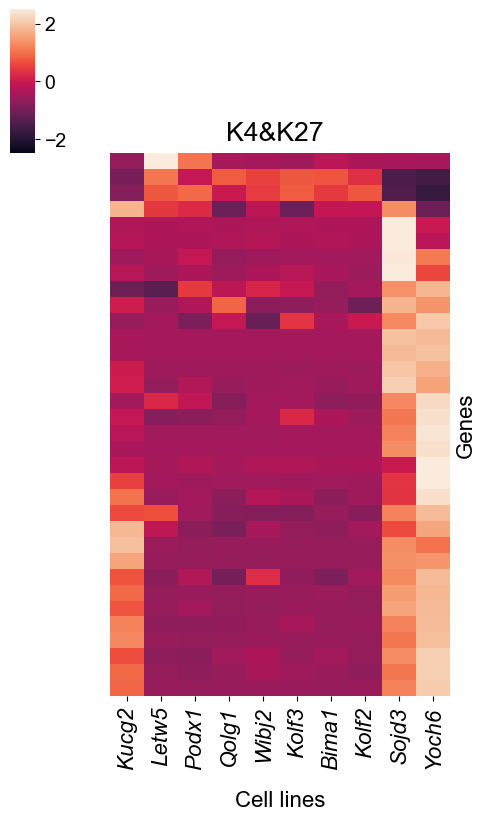

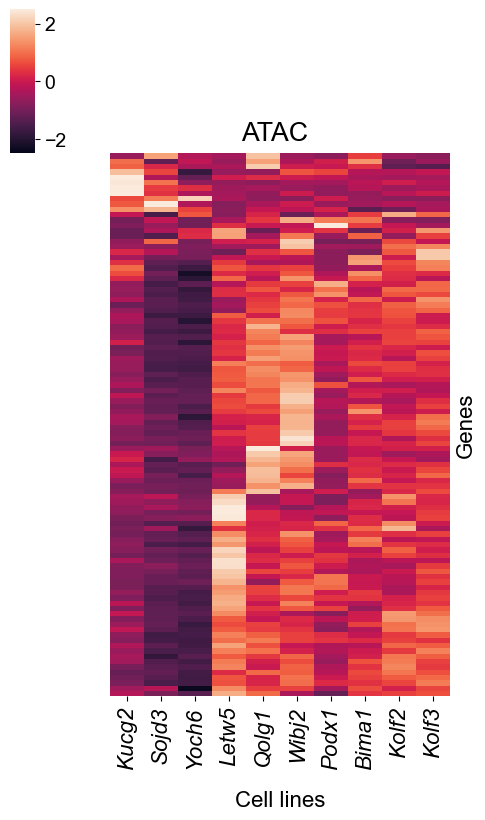

In [22]:
import seaborn as sns

clusters_f=[1, 5, 0, 9, 8] #change to 5, 0, 9, 8 to obtain the heatmaps in Fig. 6A and SF7.
for cl in clusters_f:
    cl1=DE_bin.geneid[[labels_clusters[j]==cl for j in range(len(labels_clusters))]]
    ipsc_rna_c2=DE_bin[DE_bin.geneid.isin(cl1)].iloc[:,0:11]
    ipsc_rna_c2.index=ipsc_rna_c2.geneid
    ipsc_rna_c2=ipsc_rna_c2.iloc[:,1:].astype(float)
    ipsc_rna_c2=ipsc_rna_c2.drop(ipsc_rna_c2[ipsc_rna_c2.sum(1)==0].index, axis=0)
    cg = sns.clustermap(ipsc_rna_c2, z_score=0,  yticklabels=False, figsize=(5,8), vmin=-2.5, vmax=2.5)
    cg.ax_row_dendrogram.set_visible(False)
    cg.ax_col_dendrogram.set_visible(False)
    #cg.cax.set_visible(False)
    cg.ax_heatmap.set_ylabel('Genes')
    cg.ax_heatmap.set_xlabel('Cell lines', labelpad=15)
    cg.fig.suptitle(cluster_names[cl], y=0.84, x=0.55)
    for tick_label in cg.ax_heatmap.get_xticklabels():
        tick_label.set_style('italic')
    
    filename="zscore_cl"+str(cl)+".png"
    plt.savefig(filename, format='png',bbox_inches='tight', dpi=300)



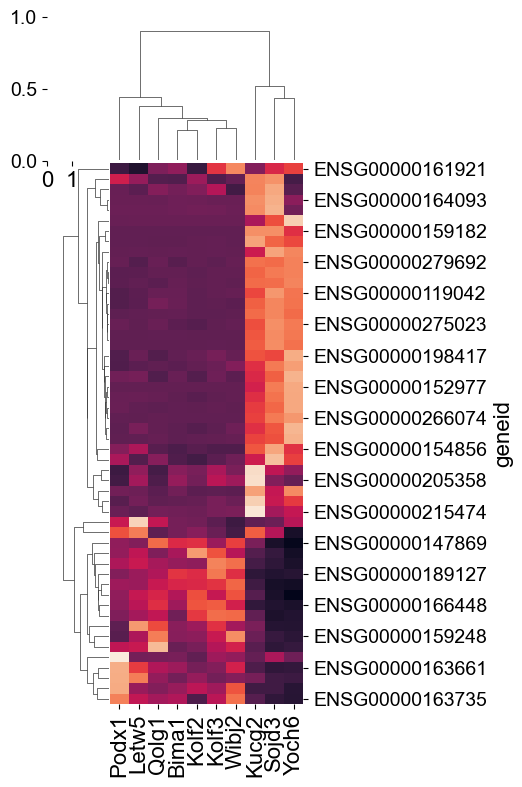

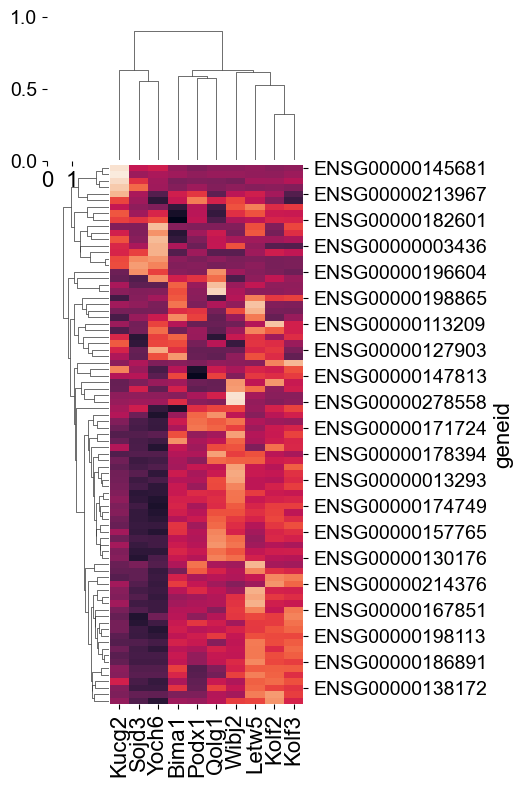

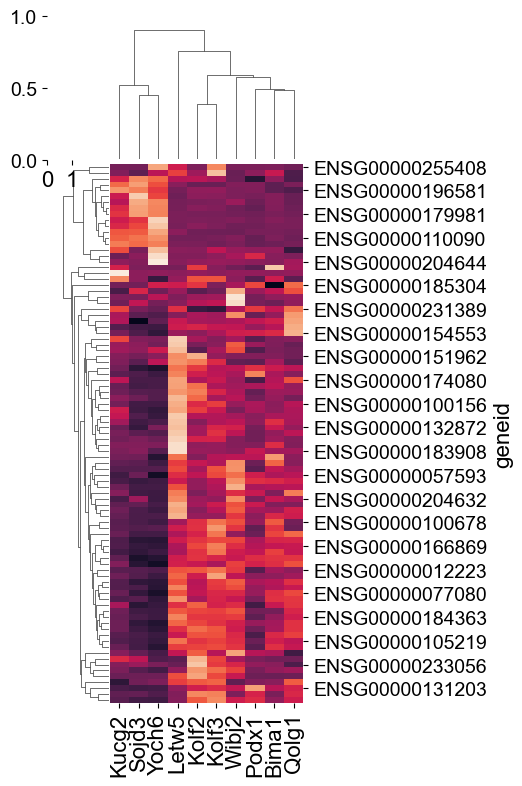

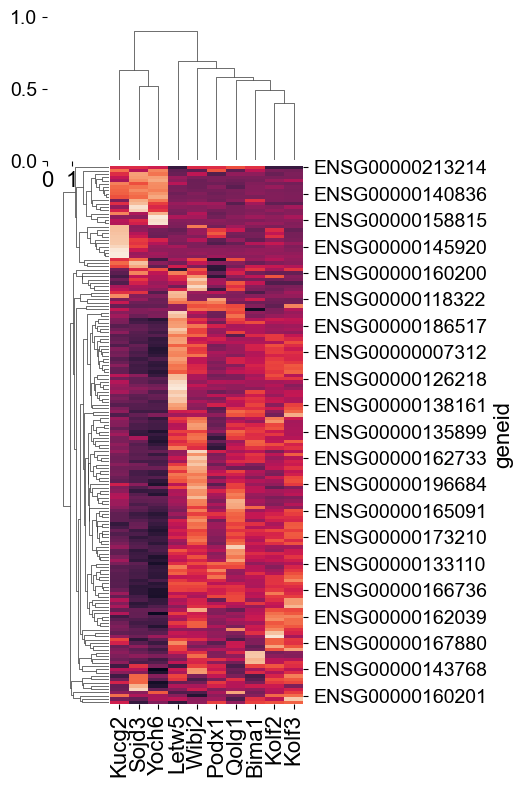

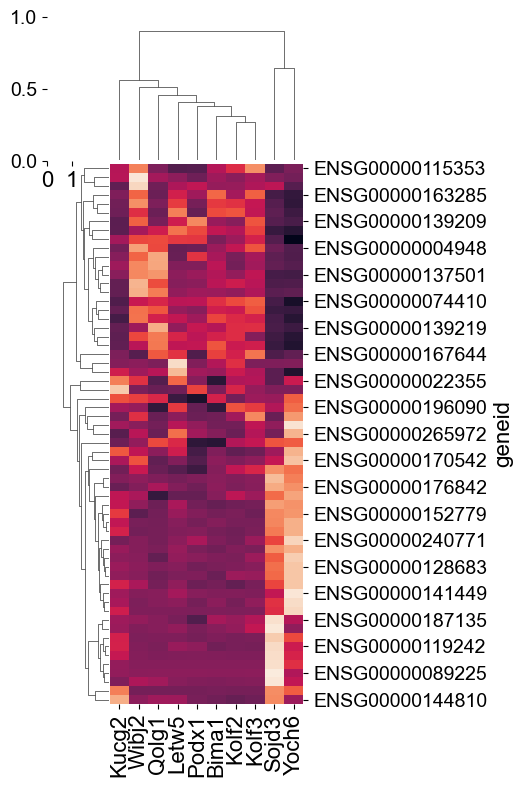

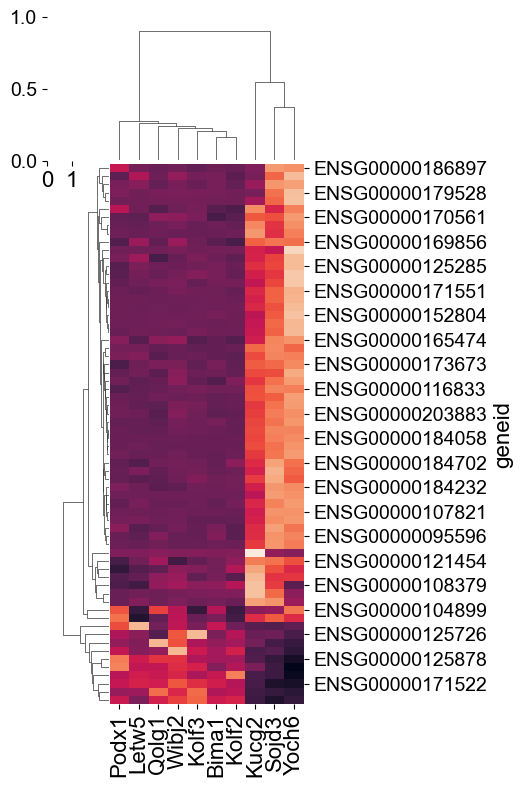

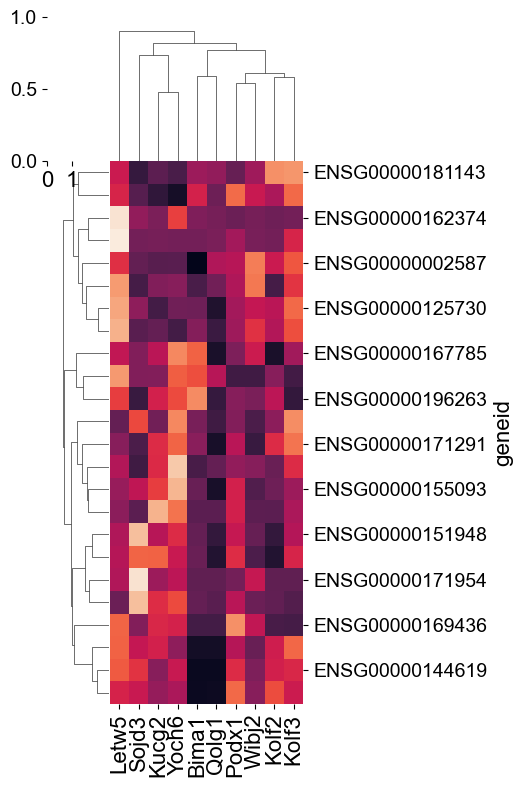

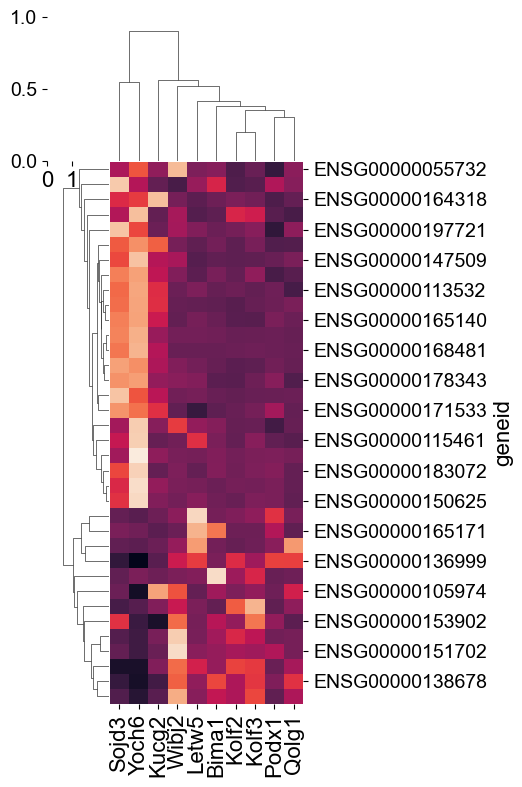

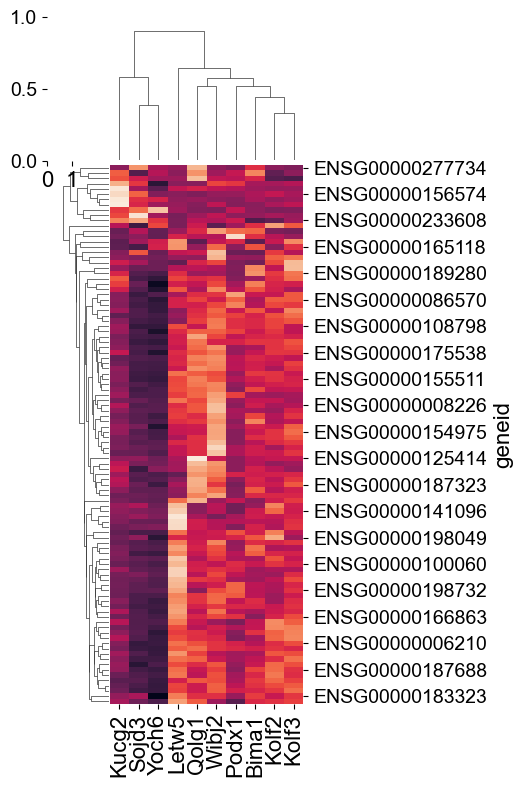

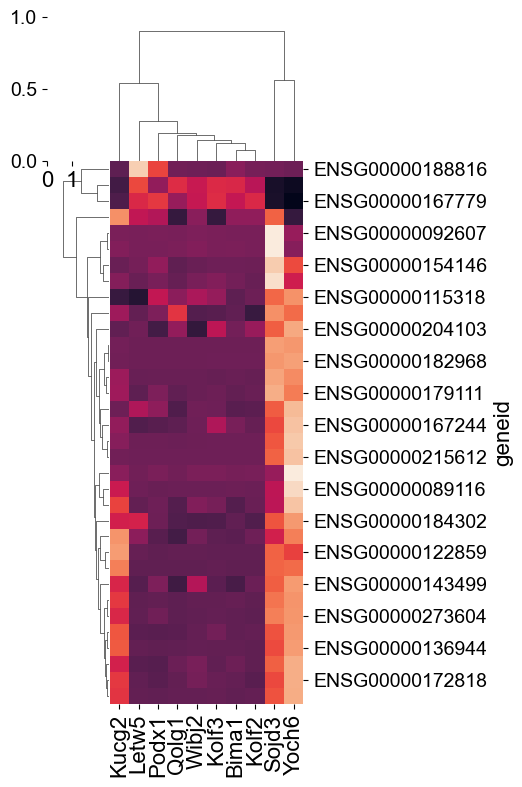

In [23]:
abs_corrs=np.zeros([10,45])
for cl in range(10):
    cl1=DE_bin.geneid[[labels_clusters[j]==cl for j in range(len(labels_clusters))]]
    ipsc_rna_c2=DE_bin[DE_bin.geneid.isin(cl1)].iloc[:,0:11]
    ipsc_rna_c2.index=ipsc_rna_c2.geneid
    ipsc_rna_c2=ipsc_rna_c2.iloc[:,1:].astype(float)
    ipsc_rna_c2=ipsc_rna_c2.drop(ipsc_rna_c2[ipsc_rna_c2.sum(1)==0].index, axis=0)
    cg = sns.clustermap(ipsc_rna_c2, z_score=0, figsize=(5,8), cbar=False, cbar_kws=None)
    zsc_corr=abs(cg.data2d.corr())
    indx=0
    for i in range(10):
        for j in range(i):
            abs_corrs[cl,indx]=zsc_corr.iloc[i,j]
            indx=indx+1

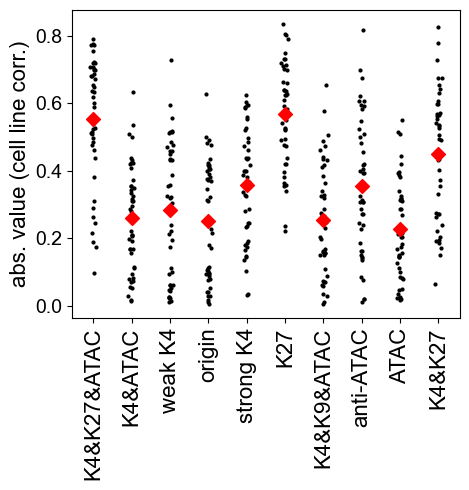

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
xax=np.arange(10)
for i in range(10):
    ax.scatter(xax[i]+np.random.normal(0, 0.04,45), abs_corrs[i], color='black', zorder=2, s=4)
    ax.scatter(xax[i], abs_corrs[i].mean(), color='red', marker="D", zorder=2, s=50)
ax.set_xticks(xax, cluster_names, rotation=90)
ax.set_ylabel("abs. value (cell line corr.)")
plt.savefig("Fig6B.png", format='png',bbox_inches='tight', dpi=300)

plt.show()

## Up vs Down regulation ##

In [36]:
binaries=DE_bin.iloc[:,11:22]

,Bima1_binary,Kolf2_binary,Kolf3_binary,Kucg2_binary,Letw5_binary,Podx1_binary,Qolg1_binary,Sojd3_binary,Wibj2_binary,Yoch6_binary
0,0,1,1,1,1,1,1,1,1,1
1,1,0,0,1,1,0,1,1,1,1
2,0,0,1,0,0,0,1,0,1,0
3,0,0,0,0,0,0,1,1,1,0
4,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
707,1,1,1,1,1,0,1,1,1,1
708,1,1,1,0,0,1,0,1,1,0
709,0,0,0,1,0,0,0,1,0,1
710,0,0,0,0,0,0,1,0,1,0


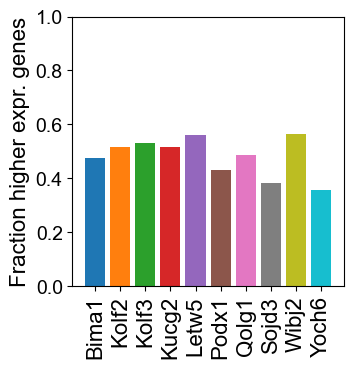

In [37]:
fig, ax = plt.subplots(figsize=(3.5,3.5))
x=np.linspace(0,9,10)
for i in range(10):
    ax.bar(x[i],(binaries.sum()/len(binaries)).to_numpy()[i])
ax.set_xticks(x, lines, rotation=90)
ax.set_ylabel("Fraction higher expr. genes")
ax.set_ylim([0,1])
plt.rc('xtick', labelsize=16) 

plt.savefig("Fig_S1B.png", format='png',bbox_inches='tight')
plt.show()

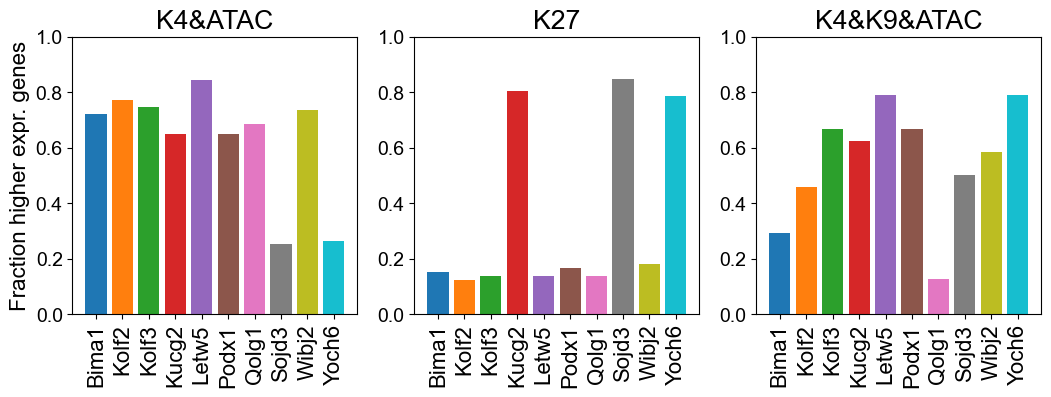

In [40]:
fig, ax = plt.subplots(1,3,figsize=(12.5,3.6))
x=np.linspace(0,9,10)
kp=0
for j in [1,5,6]:
    genes_cluster=DE_bin.geneid[[(labels_clusters[k]==j) for k in range(len(labels_clusters))]]
    binaries=DE_bin[DE_bin.geneid.isin(genes_cluster)].iloc[:,11:22]
    for i in range(10):
        ax[kp].bar(x[i],(binaries.sum()/len(binaries)).to_numpy()[i])
    ax[kp].set_xticks(x, lines, rotation=90)
    if kp==0:
        ax[kp].set_ylabel("Fraction higher expr. genes")
    ax[kp].set_ylim([0,1])
    ax[kp].set_title(cluster_names[j])   
    kp=kp+1
plt.savefig("Fig_6D.png", format='png',bbox_inches='tight')

plt.show()

# Distances with hESCs #

In [26]:
#Data from ENCODE. Two replicates.

RNA_H9_r1=pd.read_csv("RNA_hESC/ENCFF216CFE.tsv", sep='\t')
RNA_H9_r1['geneid']=RNA_H9_r1.gene_id.str[:15]
RNA_H9_r1=RNA_H9_r1[['geneid', 'TPM']]

RNA_H9_r2=pd.read_csv("RNA_hESC/ENCFF274WSK.tsv", sep='\t')
RNA_H9_r2['geneid']=RNA_H9_r2.gene_id.str[:15]
RNA_H9_r2=RNA_H9_r2[['geneid', 'TPM']]


In [27]:
# TPMs with replicates for our hiPSCs

RNAiPSCs_TPMs = pd.read_csv('RNA_counts/TPMS_hiPSC.csv')
RNAiPSCs_TPMs=RNAiPSCs_TPMs.iloc[:,1:23]

In [29]:
#Merging

RNAiPSCs_TPMs_DE=pd.merge(DE_bin.geneid,RNAiPSCs_TPMs, on="geneid")
ipsc_TPMs_H9_DE=pd.merge(RNAiPSCs_TPMs_DE,RNA_H9_r1, on="geneid")
ipsc_TPMs_H9_DE=pd.merge(ipsc_TPMs_H9_DE,RNA_H9_r2, on="geneid")
ipsc_TPMs_H9_DE=ipsc_TPMs_H9_DE.rename(columns={"TPM_x": "TPM_r1", "TPM_y": "TPM_r2"})

In [30]:
ipsc_TPMs_H9_DE

,geneid,Bima1r1,Bima1r2,Kolf2r1,Kolf2r2,Kolf3r1,Kolf3r2,Kucg2r1,Kucg2r2,Letw5r1,...,Qolg1r2,Sojd3r1,Sojd3r2,Wibj2r1,Wibj2r2,Yoch6r1,Yoch6r2,Yoch6r3,TPM_r1,TPM_r2
0,ENSG00000002587,0.089587,0.023067,0.814213,1.135033,0.858962,1.641507,0.280980,0.673789,1.228421,...,0.766133,0.658848,0.393338,1.935424,0.867656,0.426834,0.696464,0.337352,0.02,0.09
1,ENSG00000003436,1.535267,1.639744,0.290694,0.285165,0.338903,0.146515,2.367074,2.253444,1.106075,...,2.086268,1.087262,2.047177,2.961891,2.820306,6.197200,3.271191,3.318879,2.67,2.60
2,ENSG00000004948,1.932606,1.909162,2.912489,2.415228,3.515876,4.426409,1.259517,1.186552,1.157096,...,3.829906,0.580120,1.570060,5.604774,5.046880,0.798639,0.392474,0.445562,0.24,0.20
3,ENSG00000005421,0.877409,1.290927,0.071200,0.264677,0.454736,0.287086,0.000000,0.000000,0.719467,...,1.936378,0.921817,1.761064,2.467214,2.575083,0.298599,0.701601,0.078667,0.41,0.07
4,ENSG00000006016,12.740128,11.907288,8.926469,10.132740,10.238785,14.268528,59.721165,67.797619,14.818785,...,5.945348,90.227457,39.886569,27.860416,14.758599,69.657809,117.910229,100.458254,7.39,6.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,ENSG00000278662,0.740871,0.944701,0.521039,0.856711,1.243341,0.606028,1.770414,1.265468,1.665020,...,1.985417,1.141607,1.280487,3.760067,2.940567,0.966508,0.746013,1.239937,0.90,0.89
708,ENSG00000279656,5.134967,6.346242,4.833607,7.745019,5.170545,5.040448,0.000000,0.000000,0.000000,...,0.161893,6.042244,4.466147,6.339153,4.994785,2.621290,2.007411,1.289098,1.03,0.82
709,ENSG00000279692,1.300935,1.228187,1.477948,2.861522,2.247461,1.365668,17.433800,17.687212,1.382829,...,3.349581,9.567449,24.624422,2.602336,2.418116,27.117379,11.327327,17.690324,0.57,0.25
710,ENSG00000280143,3.470462,2.447235,2.131176,2.871881,2.884311,1.038342,3.744142,1.881194,1.355931,...,5.347541,0.413883,0.549093,2.821898,6.239682,2.495131,1.633381,1.138100,1.95,1.92


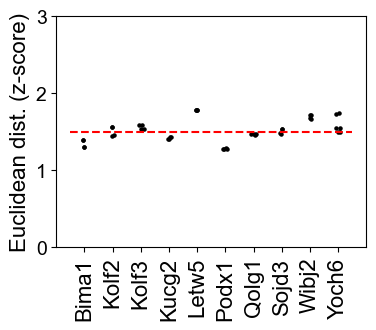

In [36]:
    from scipy.stats import zscore
    rng = np.random.default_rng()
    fig, axes = plt.subplots(figsize =(4,3))
    zsc_cluster=zscore(ipsc_TPMs_H9_DE.iloc[:,1:24], axis=1)
    hESC_ipsc_corr_DE_H9=np.zeros([42,2])
    for i in range(len(lines)):
        colname1=ipsc_TPMs_H9_DE.iloc[:,1:].columns.values[2*i]
        hESC_ipsc_corr_DE_H9[i*4,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r1"]].values)
        hESC_ipsc_corr_DE_H9[i*4,0]=i
        hESC_ipsc_corr_DE_H9[i*4+1,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r2"]].values)
        hESC_ipsc_corr_DE_H9[i*4+1,0]=i
        colname1=ipsc_TPMs_H9_DE.iloc[:,1:].columns.values[2*i+1]        
        hESC_ipsc_corr_DE_H9[i*4+2,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r1"]].values)
        hESC_ipsc_corr_DE_H9[i*4+2,0]=i
        hESC_ipsc_corr_DE_H9[i*4+3,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r2"]].values)
        hESC_ipsc_corr_DE_H9[i*4+3,0]=i
        if i==len(lines)-1:
            colname1=ipsc_TPMs_H9_DE.iloc[:,1:].columns.values[2*i+2]        
            hESC_ipsc_corr_DE_H9[i*4+4,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r1"]].values)
            hESC_ipsc_corr_DE_H9[i*4+4,0]=i
            hESC_ipsc_corr_DE_H9[i*4+5,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r2"]].values)
            hESC_ipsc_corr_DE_H9[i*4+5,0]=i
    axes.scatter(np.transpose(hESC_ipsc_corr_DE_H9)[0]+rng.normal(0, 0.05, size=(42)),np.transpose(hESC_ipsc_corr_DE_H9)[1]/np.sqrt(len(ipsc_TPMs_H9_DE)), s=5, color="black")
    axes.plot([-0.5,9.5], [np.median(np.transpose(hESC_ipsc_corr_DE_H9)[1])/np.sqrt(len(ipsc_TPMs_H9_DE)),np.median(np.transpose(hESC_ipsc_corr_DE_H9)[1])/np.sqrt(len(ipsc_TPMs_H9_DE))], linestyle="dashed", color='red')
    axes.set_ylim([0,3])
    axes.set_ylabel("Euclidean dist. (z-score)")
    axes.set_xticks(np.arange(0,10), lines, rotation=90)
    plt.savefig("Fig_S7B.png", format='png',bbox_inches='tight', dpi=300)
    

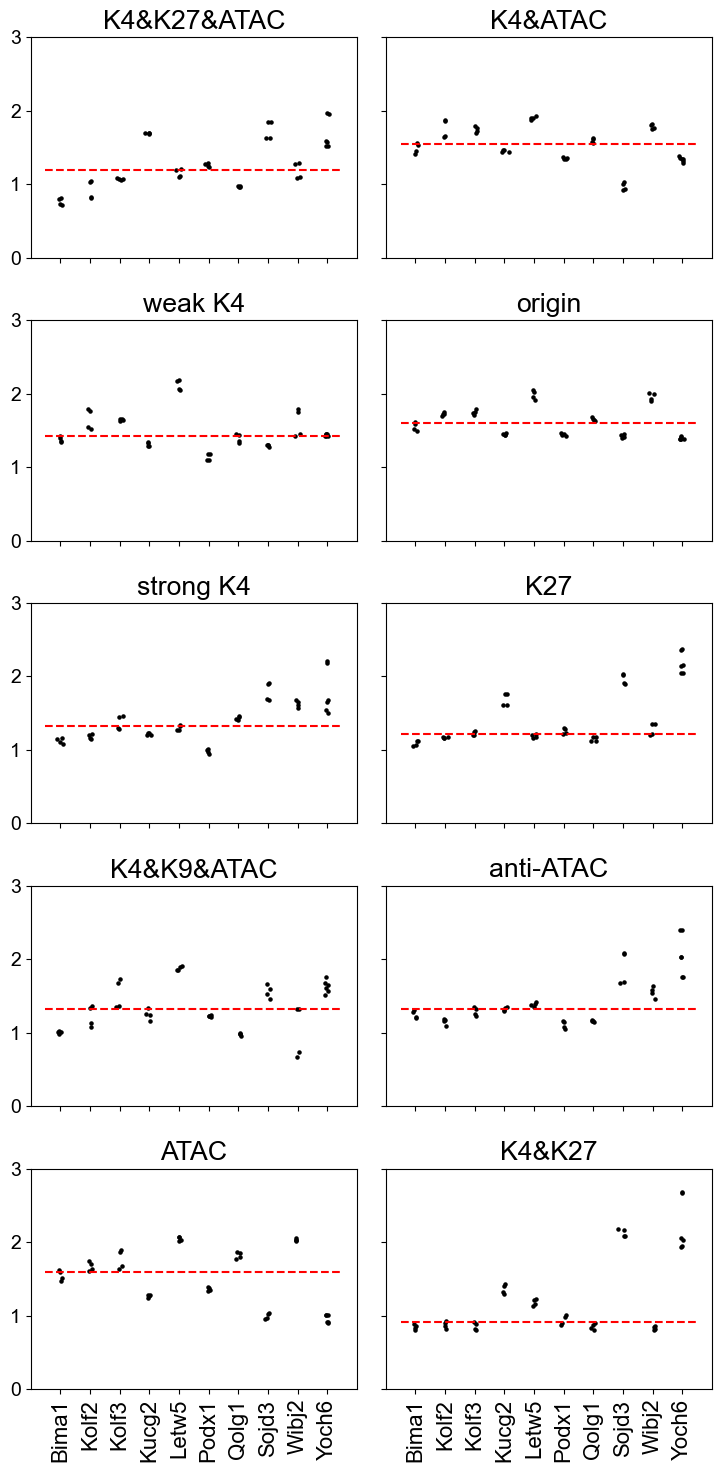

In [32]:
from scipy.stats import zscore
rng = np.random.default_rng()

fig, axes = plt.subplots(5,2, figsize =(7.5,15))
for j in range(10):
    genes_cluster=ipsc_TPMs_H9_DE[labels_clusters==j]
    zsc_cluster=zscore(genes_cluster.iloc[:,1:24], axis=1)
    hESC_ipsc_corr_DE_H9=np.zeros([42,2])
    for i in range(len(lines)):
        colname1=ipsc_TPMs_H9_DE.iloc[:,1:].columns.values[2*i]
        hESC_ipsc_corr_DE_H9[i*4,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r1"]].values)
        hESC_ipsc_corr_DE_H9[i*4,0]=i
        hESC_ipsc_corr_DE_H9[i*4+1,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r2"]].values)
        hESC_ipsc_corr_DE_H9[i*4+1,0]=i
        colname1=ipsc_TPMs_H9_DE.iloc[:,1:].columns.values[2*i+1]        
        hESC_ipsc_corr_DE_H9[i*4+2,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r1"]].values)
        hESC_ipsc_corr_DE_H9[i*4+2,0]=i
        hESC_ipsc_corr_DE_H9[i*4+3,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r2"]].values)
        hESC_ipsc_corr_DE_H9[i*4+3,0]=i
        if i==len(lines)-1:
            colname1=ipsc_TPMs_H9_DE.iloc[:,1:].columns.values[2*i+2]        
            hESC_ipsc_corr_DE_H9[i*4+4,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r1"]].values)
            hESC_ipsc_corr_DE_H9[i*4+4,0]=i
            hESC_ipsc_corr_DE_H9[i*4+5,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r2"]].values)
            hESC_ipsc_corr_DE_H9[i*4+5,0]=i
    axes.flat[j].scatter(np.transpose(hESC_ipsc_corr_DE_H9)[0]+rng.normal(0, 0.05, size=(42)),np.transpose(hESC_ipsc_corr_DE_H9)[1]/np.sqrt(len(genes_cluster)), s=5, color="black")
    axes.flat[j].plot([-0.5,9.5], [np.median(np.transpose(hESC_ipsc_corr_DE_H9)[1])/np.sqrt(len(genes_cluster)),np.median(np.transpose(hESC_ipsc_corr_DE_H9)[1])/np.sqrt(len(genes_cluster))], linestyle="dashed", color='red')
    axes.flat[j].set_ylim([0,3])
    axes.flat[j].set_title(cluster_names[j])
    axes.flat[j].set_xticks(np.arange(0,10), lines, rotation=90)
for ax in axes.flat:
    ax.label_outer()
fig.tight_layout()
plt.savefig("Fig_S7C.png", format='png',bbox_inches='tight', dpi=300)


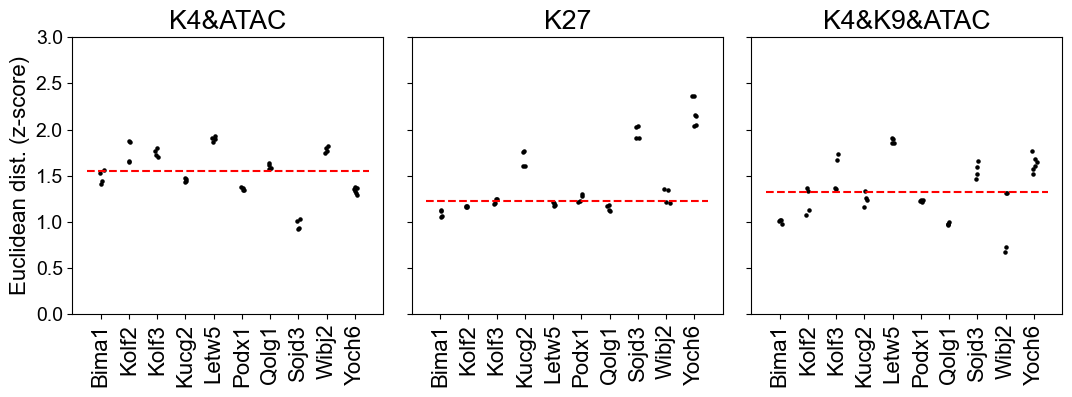

In [40]:
fig, axes = plt.subplots(1,3, figsize =(11,4.25))
vect=[1,5,6]
for j in range(3):
    genes_cluster=ipsc_TPMs_H9_DE[labels_clusters==vect[j]]
    zsc_cluster=zscore(genes_cluster.iloc[:,1:24], axis=1)
    hESC_ipsc_corr_DE_H9=np.zeros([42,2])
    for i in range(len(lines)):
        colname1=ipsc_TPMs_H9_DE.iloc[:,1:].columns.values[2*i]
        hESC_ipsc_corr_DE_H9[i*4,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r1"]].values)
        hESC_ipsc_corr_DE_H9[i*4,0]=i
        hESC_ipsc_corr_DE_H9[i*4+1,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r2"]].values)
        hESC_ipsc_corr_DE_H9[i*4+1,0]=i
        colname1=ipsc_TPMs_H9_DE.iloc[:,1:].columns.values[2*i+1]        
        hESC_ipsc_corr_DE_H9[i*4+2,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r1"]].values)
        hESC_ipsc_corr_DE_H9[i*4+2,0]=i
        hESC_ipsc_corr_DE_H9[i*4+3,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r2"]].values)
        hESC_ipsc_corr_DE_H9[i*4+3,0]=i
        if i==len(lines)-1:
            colname1=ipsc_TPMs_H9_DE.iloc[:,1:].columns.values[2*i+2]        
            hESC_ipsc_corr_DE_H9[i*4+4,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r1"]].values)
            hESC_ipsc_corr_DE_H9[i*4+4,0]=i
            hESC_ipsc_corr_DE_H9[i*4+5,1]=np.linalg.norm(zsc_cluster[[colname1]].values-zsc_cluster[["TPM_r2"]].values)
            hESC_ipsc_corr_DE_H9[i*4+5,0]=i
    axes.flat[j].scatter(np.transpose(hESC_ipsc_corr_DE_H9)[0]+rng.normal(0, 0.05, size=(42)),np.transpose(hESC_ipsc_corr_DE_H9)[1]/np.sqrt(len(genes_cluster)), s=5, color="black")
    axes.flat[j].plot([-0.5,9.5], [np.median(np.transpose(hESC_ipsc_corr_DE_H9)[1])/np.sqrt(len(genes_cluster)),np.median(np.transpose(hESC_ipsc_corr_DE_H9)[1])/np.sqrt(len(genes_cluster))], linestyle="dashed", color='red')
    axes.flat[j].set_ylim([0,3])
    axes.flat[j].set_title(cluster_names[vect[j]])
    axes.flat[j].set_xticks(np.arange(0,10), lines, rotation=90)
    if j==0:
        axes.flat[j].set_ylabel("Euclidean dist. (z-score)")
for ax in axes.flat:
    ax.label_outer()
fig.tight_layout()
plt.savefig("Fig_6C.png", format='png',bbox_inches='tight', dpi=300)

### Some more statistics for the modelling ###

In [ ]:
intensities_K27_promoters = pd.read_csv('SVM/DE_genes_K27me3_prompm1kSVM10.csv')
intensities_K4_promoters = pd.read_csv('SVM/DE_genes_K4me3_prompm1kSVM10.csv')
intensities_K27_genem1k = pd.read_csv('SVM/DE_genes_K27me3_genem1kSVM10.csv')
intensities_K4_genem1k = pd.read_csv('SVM/DE_genes_K4me3_genem1kSVM10.csv')

In [63]:
data_levels_maxs=pd.DataFrame(columns=['level', 'cluster', 'annot'])
ind=0
for ib in range(10):
    for gene in DE_bin.geneid[[labels_clusters[i]==ib for i in range(len(labels_clusters))]]:
        y = intensities_K27_genem1k[intensities_K27_genem1k['geneid']==gene][lines].values
        if (y.size>0):
            data_levels_maxs.loc[ind,"level"]=y.max()
            data_levels_maxs.loc[ind,"cluster"]=str(ib)
            data_levels_maxs.loc[ind,"annot"]="H3K27me3_body"
            ind=ind+1
for ib in range(10):
    for gene in DE_bin.geneid[[labels_clusters[i]==ib for i in range(len(labels_clusters))]]:
        x = intensities_K4_promoters[intensities_K4_promoters['geneid']==gene][lines].values
        if (x.size>0):
            data_levels_maxs.loc[ind,"level"]=x.max()
            data_levels_maxs.loc[ind,"cluster"]=str(ib)
            data_levels_maxs.loc[ind,"annot"]="H3K4me3_promoter"
            ind=ind+1
        y = intensities_K27_promoters[intensities_K27_promoters['geneid']==gene][lines].values
        if (y.size>0):
            data_levels_maxs.loc[ind,"level"]=y.max()
            data_levels_maxs.loc[ind,"cluster"]=str(ib)
            data_levels_maxs.loc[ind,"annot"]="H3K27me3_promoter"
            ind=ind+1


In [64]:

mean_K4pm1k=data_levels_maxs[data_levels_maxs.annot=="H3K4me3_promoter"][["level","cluster"]].groupby("cluster").median().values
mean_K4body=data_levels_maxs[data_levels_maxs.annot=="H3K4me3_body"][["level","cluster"]].groupby("cluster").median().values
mean_K27pm1k=data_levels_maxs[data_levels_maxs.annot=="H3K27me3_promoter"][["level","cluster"]].groupby("cluster").median().values
mean_K27body=data_levels_maxs[data_levels_maxs.annot=="H3K27me3_body"][["level","cluster"]].groupby("cluster").median().values



In [65]:
data_levels_mins=pd.DataFrame(columns=['level', 'cluster', 'annot'])
ind=0
for ib in range(10):
    for gene in DE_bin.geneid[[labels_clusters[i]==ib for i in range(len(labels_clusters))]]:
        y = intensities_K27_genem1k[intensities_K27_genem1k['geneid']==gene][lines].values
        if (y.size>0):
            data_levels_mins.loc[ind,"level"]=y.min()
            data_levels_mins.loc[ind,"cluster"]=str(ib)
            data_levels_mins.loc[ind,"annot"]="H3K27me3_body"
            ind=ind+1
for ib in range(10):
    for gene in DE_bin.geneid[[labels_clusters[i]==ib for i in range(len(labels_clusters))]]:
        x = intensities_K4_promoters[intensities_K4_promoters['geneid']==gene][lines].values
        if (x.size>0):
            data_levels_mins.loc[ind,"level"]=x.min()
            data_levels_mins.loc[ind,"cluster"]=str(ib)
            data_levels_mins.loc[ind,"annot"]="H3K4me3_promoter"
            ind=ind+1
        y = intensities_K27_promoters[intensities_K27_promoters['geneid']==gene][lines].values
        if (y.size>0):
            data_levels_mins.loc[ind,"level"]=y.min()
            data_levels_mins.loc[ind,"cluster"]=str(ib)
            data_levels_mins.loc[ind,"annot"]="H3K27me3_promoter"
            ind=ind+1

In [66]:

meanmin_K4pm1k=data_levels_mins[data_levels_mins.annot=="H3K4me3_promoter"][["level","cluster"]].groupby("cluster").median().values
meanmin_K4body=data_levels_mins[data_levels_mins.annot=="H3K4me3_body"][["level","cluster"]].groupby("cluster").median().values
meanmin_K27pm1k=data_levels_mins[data_levels_mins.annot=="H3K27me3_promoter"][["level","cluster"]].groupby("cluster").median().values
meanmin_K27body=data_levels_mins[data_levels_mins.annot=="H3K27me3_body"][["level","cluster"]].groupby("cluster").median().values


In [67]:
dyn_range=pd.DataFrame(columns=['K4', 'K27b', 'K27p'])
for i in range(10):
    dyn_range.loc[i]=[((mean_K4pm1k[i]- meanmin_K4pm1k[i])/mean_K4pm1k[i])[0], ((mean_K27body[i]- meanmin_K27body[i])/mean_K27body[i])[0], ((mean_K27pm1k[i]- meanmin_K27pm1k[i])/mean_K27pm1k[i])[0]]

dyn_range.to_csv('dyn_range_clusters.csv')

In [68]:
dyn_range

,K4,K27b,K27p
0,0.746329,0.930247,0.940249
1,0.987360,0.867589,0.953616
2,0.941557,0.872893,0.919325
3,1.000000,0.824330,0.931341
4,0.741923,0.842016,0.908728
5,0.660272,0.951463,0.932782
6,0.991932,0.877537,0.988563
7,0.560242,0.812489,0.828994
8,0.888603,0.810046,0.852223
9,0.733388,0.868872,0.902491


In [72]:
correlations_pm1k=pd.DataFrame(columns=['corr', 'cluster'])
correlations=pd.DataFrame(columns=['corr', 'cluster'])


for ib in range(10):
    for gene in DE_bin.geneid[[labels_clusters[i]==ib for i in range(len(labels_clusters))]]:
        y = intensities_K27_promoters[intensities_K27_promoters['geneid']==gene][lines].values
        y2 = intensities_K27_genem1k[intensities_K27_genem1k['geneid']==gene][lines].values
        z = intensities_K4_promoters[intensities_K4_promoters['geneid']==gene][lines].values
        if (intensities_K4_promoters[intensities_K4_promoters['geneid']==gene].size !=0):
            corrs=pd.DataFrame(data={'H3K4me3 prom': z[0], 'H3K27me3 prom': y[0]})
            correl=corrs.corr(method='pearson').values[0,1]
            correlations_pm1k.loc[ind,"corr"]=correl
            correlations_pm1k.loc[ind,"cluster"]=cluster_names[ib]
            corrs=pd.DataFrame(data={'H3K4me3 prom': z[0], 'H3K27me3 body': y2[0]})
            correl=corrs.corr(method='pearson').values[0,1]
            correlations.loc[ind,"corr"]=correl
            correlations.loc[ind,"cluster"]=cluster_names[ib]            
            ind=ind+1
            
avg_corr_pm1k=np.zeros(10)
avg_corr=np.zeros(10)
i=0
for clust in cluster_names:
    avg_corr_pm1k[i]=correlations_pm1k[correlations_pm1k['cluster']==clust]["corr"].median()
    avg_corr[i]=correlations[correlations['cluster']==clust]["corr"].median()
    i+=1

In [73]:
correls=pd.DataFrame(columns=['K4_K27p', 'K4_K27b'])
for i in range(10):
    correls.loc[i]=[avg_corr_pm1k[i], avg_corr[i]]
    
correls.to_csv('correls_K4K27_clusters.csv')

In [76]:
correls

,K4_K27p,K4_K27b
0,-0.667085,-0.649098
1,0.270806,-0.034518
2,-0.022469,-0.060669
3,-0.000024,-0.022282
4,-0.342735,-0.356334
5,-0.337605,-0.367937
6,0.477712,0.331594
7,-0.140980,-0.182869
8,0.058974,-0.082786
9,-0.673625,-0.705090


In [66]:
# scatter plot -  The important ones

for j in [0,5,9]:
    XY = pd.DataFrame(columns=['K4', 'K27b', 'RNA'])
    for gene in DE_bin.geneid[[labels_clusters[i]==j for i in range(len(labels_clusters))]]:
        x = intensities_K4[intensities_K4['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
        if (x.max() - x.min())!=0:
            x = (x - x.min()) / (x.max() - x.min())
        y = intensities_K27_genem1k[intensities_K27_genem1k['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
        if (y.max() - y.min())!=0:
            y = (y - y.min()) / (y.max() - y.min())
        z = DE_bin[DE_bin['geneid']==gene][["Bima1", "Kolf2", "Kolf3", "Kucg2", "Letw5", "Podx1", "Qolg1", "Sojd3", "Wibj2", "Yoch6"]].values
        if (z.max() - z.min())!=0:
            z = (z - z.min()) / (z.max() - z.min())

        xy = pd.DataFrame({'K4': x[0], 'K27b': y[0], 'RNA':z[0]}) 
        XY=pd.concat([XY, xy])
        
    filename="Norm_data_cl_"+str(j)+".csv"
    XY.to_csv(filename)
        


C:\Users\movilla\AppData\Local\Temp\ipykernel_9484\3156315834.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  XY=pd.concat([XY, xy])
C:\Users\movilla\AppData\Local\Temp\ipykernel_9484\3156315834.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  XY=pd.concat([XY, xy])
C:\Users\movilla\AppData\Local\Temp\ipykernel_9484\3156315834.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty o